# Brain Tumor MRI Classification
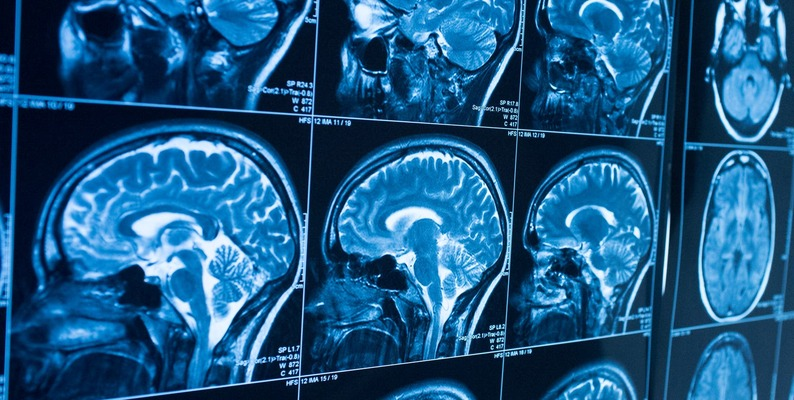

Import Libraries 

In [71]:
import os 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf 
from tensorflow import keras 
from sklearn.metrics  import confusion_matrix, classification_report






import warnings 

warnings.filterwarnings('ignore')

In [2]:
train_data_dir = '/kaggle/input/brain-tumor-mri-dataset/Training'

label_train = []
img_path_train = []
cat = os.listdir(train_data_dir)
for path in cat:
    
    imgs = os.listdir(train_data_dir+ '/'+ path)
    
    for img in imgs:
        
        label_train.append(path)
        img_path_train.append(train_data_dir + '/' + path + '/' +img)
        
img_train_ser = pd.Series(img_path_train,  name = 'img_path')
label_train_ser = pd.Series(label_train,  name = 'label')

df_train = pd.concat([img_train_ser, label_train_ser], axis = 1)
df_train.head()


,img_path,label
0,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
1,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
2,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
3,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
4,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary


In [3]:
test_data_dir = '/kaggle/input/brain-tumor-mri-dataset/Testing'

label_test = []
img_path_test = []
cat = os.listdir(test_data_dir)
for path in cat:
    
    imgs = os.listdir(test_data_dir+ '/'+ path)
    
    for img in imgs:
        
        label_test.append(path)
        img_path_test.append(test_data_dir + '/' + path + '/' + img)
        
img_test_ser = pd.Series(img_path_test,  name = 'img_path')
label_test_ser = pd.Series(label_test,  name = 'label')

df_test = pd.concat([img_test_ser, label_test_ser], axis = 1)
df_test.head()

,img_path,label
0,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
1,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
2,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
3,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
4,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary


In [4]:
df_train.shape, df_test.shape

((5712, 2), (1311, 2))

In [5]:
df_train['label'].value_counts()

label
notumor       1595
pituitary     1457
meningioma    1339
glioma        1321
Name: count, dtype: int64

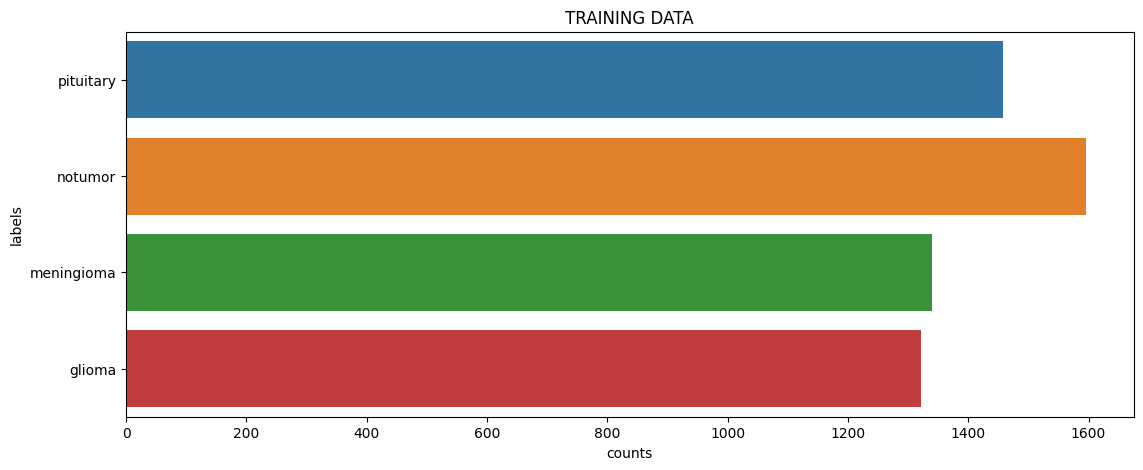

In [6]:
plt.figure(figsize = (13,5))
sns.countplot(data = df_train, y = 'label')
plt.ylabel('labels')
plt.xlabel('counts')
plt.title('TRAINING DATA')
plt.show()

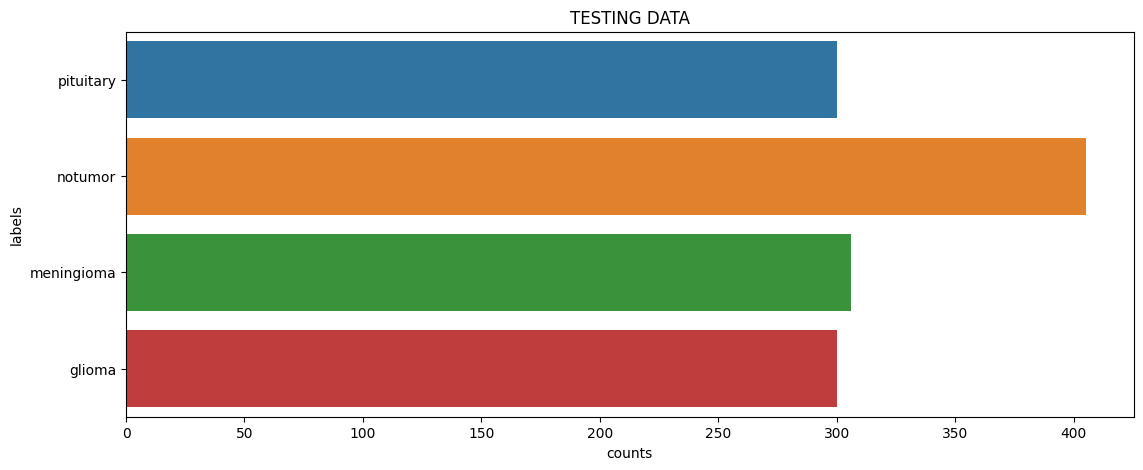

In [7]:
plt.figure(figsize = (13,5))
sns.countplot(data = df_test, y = 'label')
plt.ylabel('labels')
plt.xlabel('counts')
plt.title('TESTING DATA')
plt.show()

### split dataset

In [8]:
valid_df, test_df = train_test_split(df_test, random_state = 32, test_size = 0.5)

In [9]:
valid_df.shape, test_df.shape

((655, 2), (656, 2))

## Create Image Data Generator

In [10]:
df_train

,img_path,label
0,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
1,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
2,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
3,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
4,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
...,...,...
5707,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma
5708,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma
5709,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma
5710,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma


In [11]:
batch_size = 16
img_size   = (224 , 224)

tr_genrator = ImageDataGenerator()
test_generator = ImageDataGenerator()


train_generator = tr_genrator.flow_from_dataframe(df_train,
                                                  x_col='img_path', 
                                                  y_col='label',
                                                  target_size = img_size,
                                                  batch_size = batch_size,
                                                  shuffle = True,
                                                  class_mode = 'categorical',
                                                  color_mode = 'rgb'
                                                  
                                                 )
valid_generator = test_generator.flow_from_dataframe(valid_df,
                                                 x_col = 'img_path',
                                                 y_col = 'label',
                                                 target_size = img_size,
                                                  batch_size = batch_size,
                                                  shuffle = False, 
                                                  class_mode = 'categorical',
                                                  color_mode = 'rgb')
 
test_generator = test_generator.flow_from_dataframe(test_df,
                                                 x_col = 'img_path',
                                                 y_col = 'label',
                                                 target_size = img_size,
                                                  batch_size = batch_size,
                                                  shuffle = False, 
                                                  class_mode = 'categorical',
                                                  color_mode = 'rgb')

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


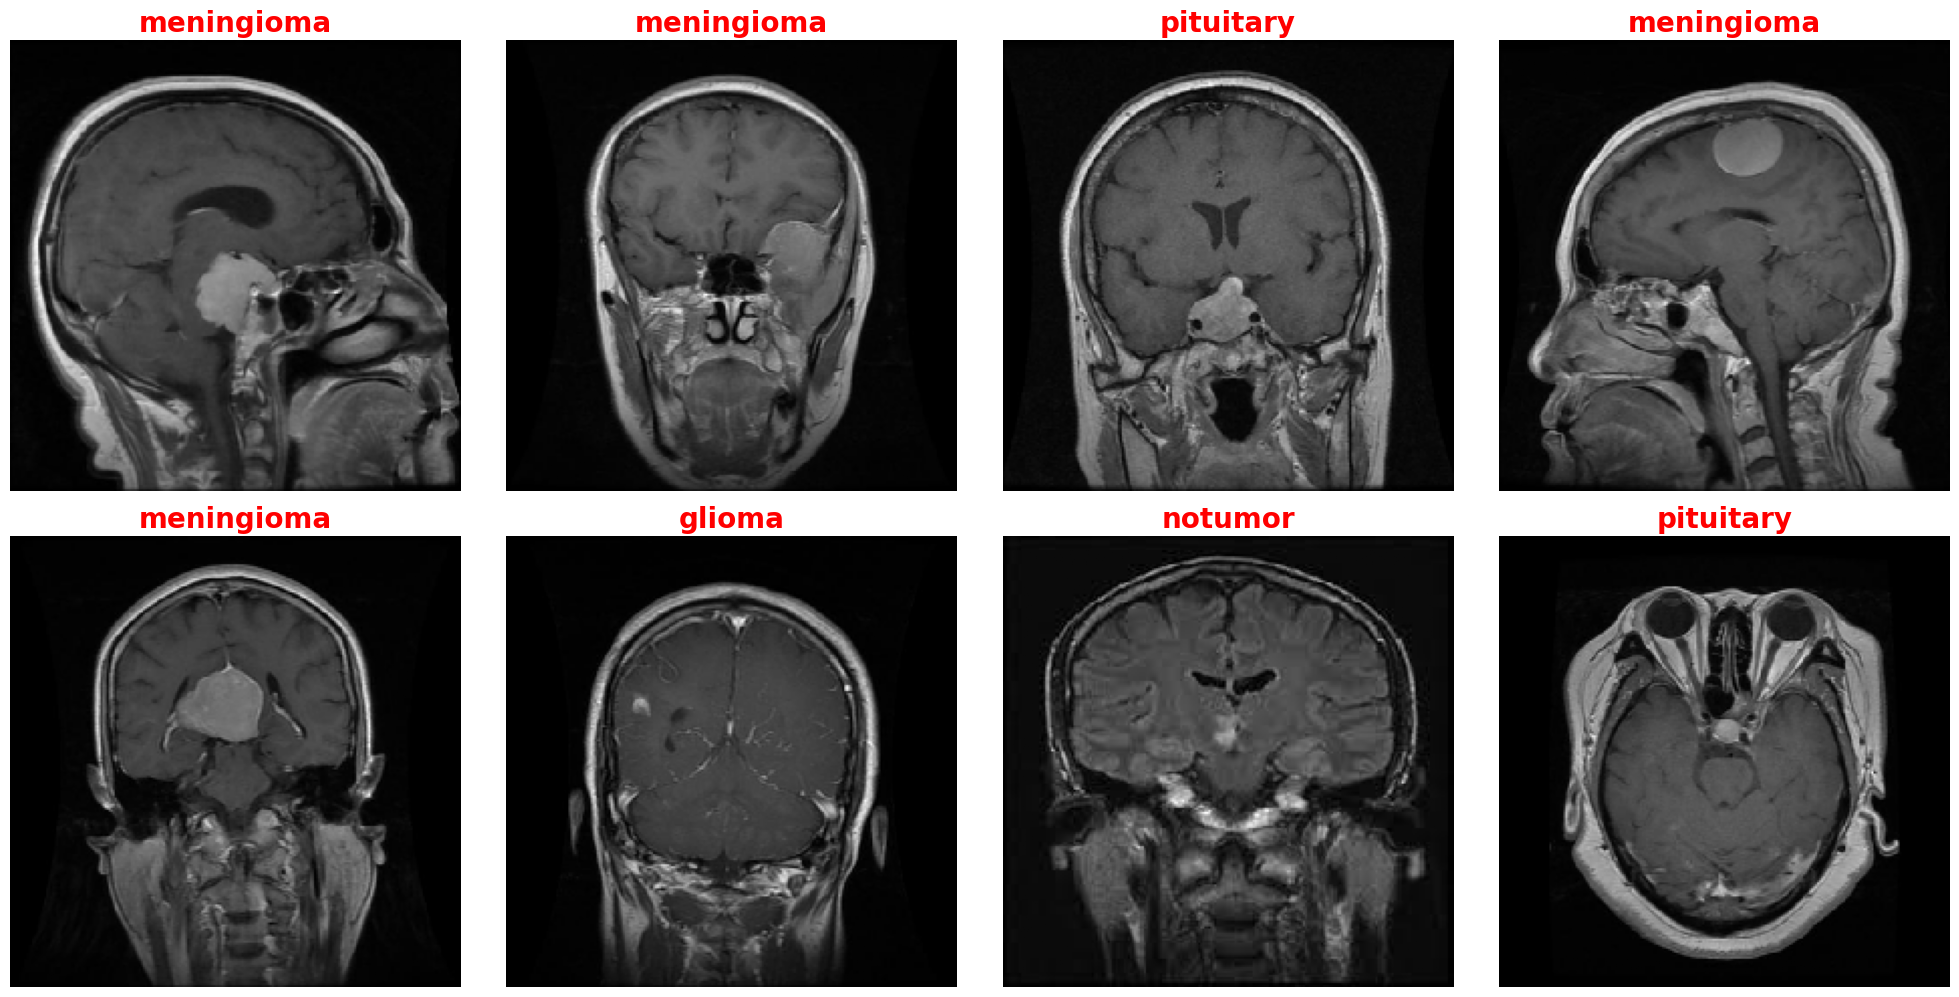

In [12]:
class_dict = train_generator.class_indices
classes = list(class_dict.keys())

imgs, labels = next(train_generator)

plt.figure(figsize= (20, 20))

for i in range(8):
    
    plt.subplot(4, 4, i +1 )
    img = imgs[i]/255
    
    plt.imshow(img) 
    index = np.argmax(labels[i])
    
    class_name = classes[index]
    
    plt.title(class_name, color = 'red',fontsize = 20, weight = 'bold')
    plt.axis('off')
    
    
plt.tight_layout()
plt.show()
    


### Creating Model 

In [13]:
img_shape = (224, 224, 3)
class_num = len(list(class_dict.keys()))

model1 = keras.Sequential()
model1.add(keras.layers.Conv2D(kernel_size=(3, 3), filters=64, input_shape =img_shape, activation = 'relu', padding ='same'))
model1.add(keras.layers.Conv2D(kernel_size=(3, 3), filters=64, activation = 'relu', padding ='same'))
model1.add(keras.layers.MaxPool2D(2, 2))

model1.add(keras.layers.Conv2D(kernel_size=(3, 3), filters=128, activation = 'relu', padding ='same'))
model1.add(keras.layers.Conv2D(kernel_size=(3, 3), filters=128, activation = 'relu', padding ='same'))
model1.add(keras.layers.MaxPool2D(2, 2))

model1.add(keras.layers.Conv2D(kernel_size=(3, 3), filters=256, activation = 'relu', padding ='same'))
model1.add(keras.layers.Conv2D(kernel_size=(3, 3), filters=256, activation = 'relu', padding ='same'))
model1.add(keras.layers.Conv2D(kernel_size=(3, 3), filters=256, activation = 'relu', padding ='same'))
model1.add(keras.layers.MaxPool2D(2, 2))

model1.add(keras.layers.Conv2D(kernel_size=(3, 3), filters=512, activation = 'relu', padding ='same'))
model1.add(keras.layers.Conv2D(kernel_size=(3, 3), filters=512, activation = 'relu', padding ='same'))
model1.add(keras.layers.Conv2D(kernel_size=(3, 3), filters=512, activation = 'relu', padding ='same'))
model1.add(keras.layers.MaxPool2D(2, 2))


model1.add(keras.layers.Flatten())


model1.add(keras.layers.Dense(512, activation = 'relu'))
model1.add(keras.layers.Dense(64, activation = 'relu'))
model1.add(keras.layers.Dense(4, activation = 'softmax'))


In [14]:
model1.compile(keras.optimizers.Adamax(learning_rate= 0.001), loss ='categorical_crossentropy', metrics = ['accuracy'])

In [15]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,049,092 (225.25 MB)

 Trainable params: 59,049,092 (225.25 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model2 = keras.Sequential()
model2.add(keras.layers.Conv2D(kernel_size= (3, 3), filters = 64, input_shape = img_shape, activation = 'relu',  padding = 'same'))
model2.add(keras.layers.Conv2D(kernel_size= (3, 3), filters = 64,  activation = 'relu',  padding= 'same'))
model2.add(keras.layers.MaxPool2D(2,2))
           
model2.add(keras.layers.Conv2D(kernel_size= (3, 3), filters = 128, activation = 'relu',  padding = 'same'))
model2.add(keras.layers.Conv2D(kernel_size= (3, 3), filters = 128,  activation = 'relu', padding = 'same'))  
model2.add(keras.layers.MaxPool2D(2,2))
           
           
model2.add(keras.layers.Conv2D(kernel_size= (3, 3), filters = 256, activation = 'relu',  padding = 'same'))
model2.add(keras.layers.Conv2D(kernel_size= (3, 3), filters = 256,  activation = 'relu', padding = 'same')) 
model2.add(keras.layers.Conv2D(kernel_size= (3, 3), filters = 256,  activation = 'relu', padding = 'same')) 
model2.add(keras.layers.MaxPool2D(2,2))
           
           
model2.add(keras.layers.Conv2D(kernel_size= (3, 3), filters = 256,  activation = 'relu', padding = 'same') )
model2.add(keras.layers.Conv2D(kernel_size= (3, 3), filters = 512,  activation = 'relu', padding = 'same') )
model2.add(keras.layers.Conv2D(kernel_size= (3, 3), filters = 512,  activation = 'relu', padding = 'same') )
model2.add(keras.layers.Conv2D(kernel_size= (3, 3), filters = 512,  activation = 'relu', padding = 'same') )
model2.add(keras.layers.MaxPool2D(2,2))

model2.add(keras.layers.Flatten())
           
model2.add(keras.layers.Dense(512, activation = 'relu'))
model2.add(keras.layers.Dense(128, activation = 'relu'))
model2.add(keras.layers.Dense(4, activation = 'softmax'))


           
           
           

In [17]:
model2.compile(keras.optimizers.Adamax(learning_rate= 0.001), loss ='categorical_crossentropy', metrics = ['accuracy'])

In [18]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,672,260 (227.63 MB)

 Trainable params: 59,672,260 (227.63 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
hist1 = model1.fit(train_generator, epochs = 10, verbose = 1, validation_data = valid_generator, shuffle = False)

Epoch 1/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.5358 - loss: 31.4419

W0000 00:00:1712859689.247736      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


357/357 ━━━━━━━━━━━━━━━━━━━━ 131s 244ms/step - accuracy: 0.5362 - loss: 31.3718 - val_accuracy: 0.7649 - val_loss: 0.5764
Epoch 2/10


W0000 00:00:1712859708.992999      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


357/357 ━━━━━━━━━━━━━━━━━━━━ 71s 198ms/step - accuracy: 0.8505 - loss: 0.4160 - val_accuracy: 0.8336 - val_loss: 0.4677
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 72s 201ms/step - accuracy: 0.9025 - loss: 0.2742 - val_accuracy: 0.8656 - val_loss: 0.2996
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 73s 203ms/step - accuracy: 0.9301 - loss: 0.2081 - val_accuracy: 0.8840 - val_loss: 0.2654
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 73s 203ms/step - accuracy: 0.9445 - loss: 0.1503 - val_accuracy: 0.9023 - val_loss: 0.2662
Epoch 6/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 73s 204ms/step - accuracy: 0.9700 - loss: 0.0893 - val_accuracy: 0.9435 - val_loss: 0.1483
Epoch 7/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 73s 204ms/step - accuracy: 0.9743 - loss: 0.0720 - val_accuracy: 0.9603 - val_loss: 0.1036
Epoch 8/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 73s 204ms/step - accuracy: 0.9866 - loss: 0.0408 - val_accuracy: 0.9511 - val_loss: 0.1898
Epoch 9/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 73s 204ms/step - accuracy: 0.9903 - loss: 0.0248 - val

In [20]:
accuracy = hist1.history['accuracy']
loss =  hist1.history['loss']
val_loss =  hist1.history['val_loss']
val_accuracy = hist1.history['val_accuracy']

epochs = [i+1 for i in range(10)]

max_acc_index = np.argmax(val_accuracy)

min_loss_index = np.argmin(val_loss)

max_acc = val_accuracy[max_acc_index]
min_loss = val_loss[min_loss_index]

acc_label = f'best epoch = {max_acc_index +1}'
loss_label = f'best epoch = {min_loss_index +1}'



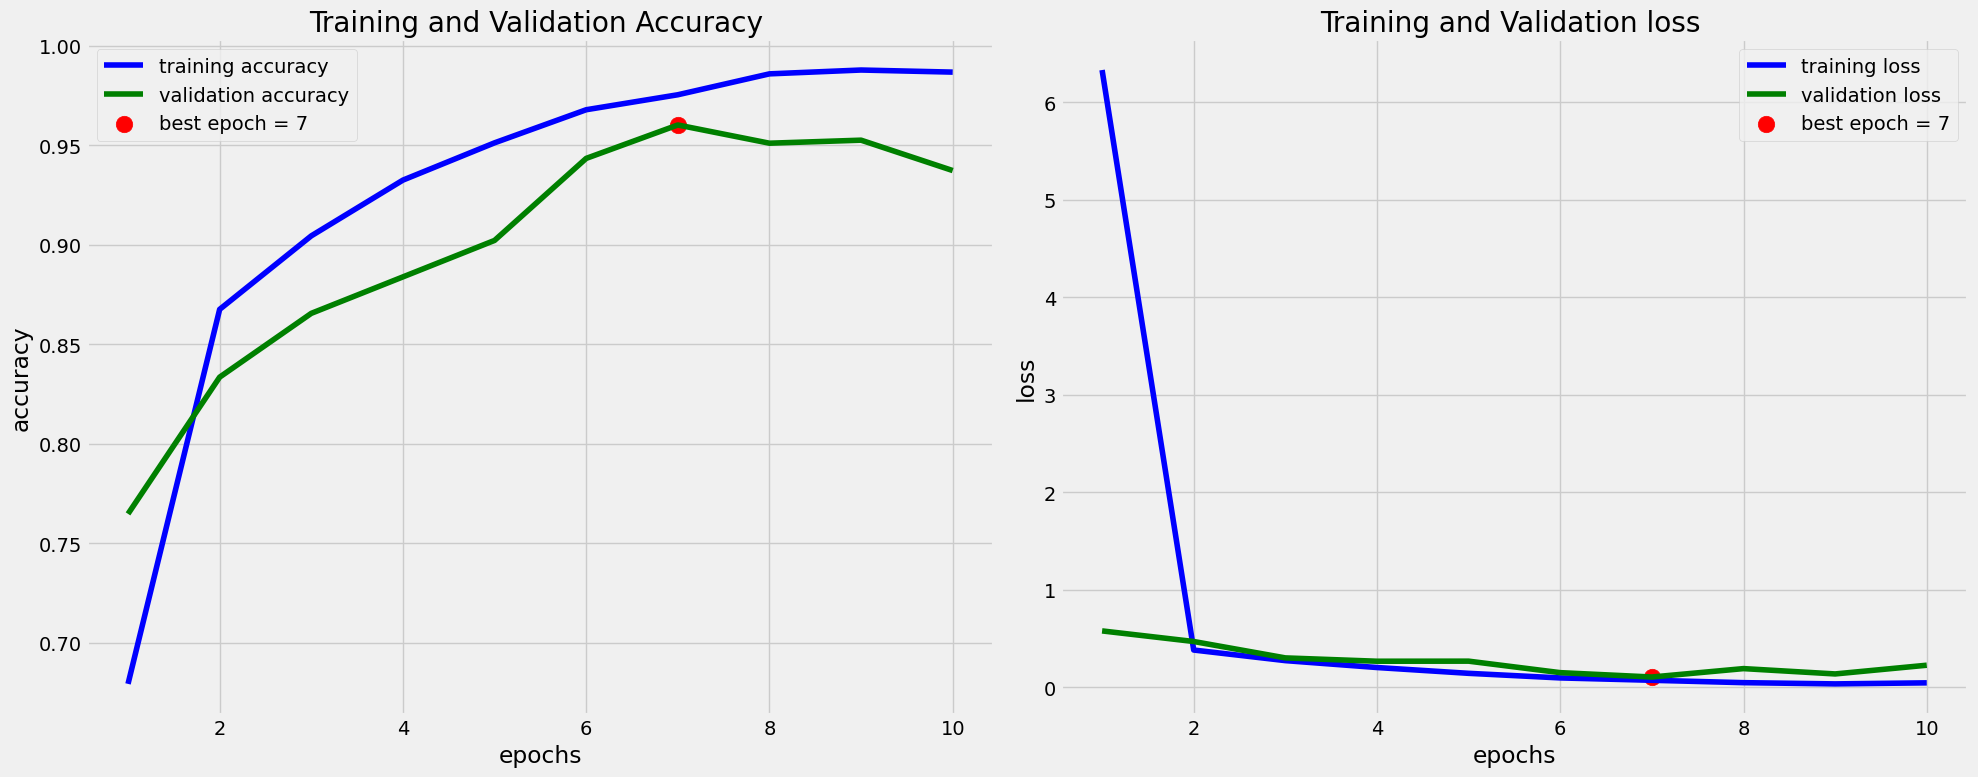

In [26]:
plt.figure(figsize = (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1,2,1)
plt.plot( epochs,  accuracy, color= 'blue' , label = 'training accuracy')
plt.plot( epochs, val_accuracy,color ='green', label = 'validation accuracy')
plt.scatter( max_acc_index + 1,  max_acc, color = 'red', label = acc_label,s = 140)

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy ')
plt.legend()


plt.subplot(1,2,2)
plt.plot( epochs,  loss, color= 'blue' , label = 'training loss')
plt.plot( epochs, val_loss,color ='green', label = 'validation loss')
plt.scatter( min_loss_index + 1,min_loss, color = 'red', label = loss_label, s = 140)

plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training and Validation loss ')
plt.legend()


plt.tight_layout()
plt.show()

### Evaluation

In [28]:
train_scores = model1.evaluate(train_generator)
valid_scores = model1.evaluate(valid_generator)
test_scores = model1.evaluate(test_generator)

357/357 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.9926 - loss: 0.0356
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9359 - loss: 0.2187
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.9472 - loss: 0.2725


In [32]:
print('train loss:', train_scores[0] )
print('train accuracy:', train_scores[1] )

print( 50* "*")

print('validation loss:', valid_scores[0] )
print('validation accuracy:', valid_scores[1] )

print( 50* "*")
print('test loss:', test_scores[0] )
print('test accuracy:', test_scores[1] )


train loss: 0.03903000056743622
train accuracy: 0.9910714030265808
**************************************************
validation loss: 0.22460904717445374
validation accuracy: 0.9374045729637146
**************************************************
test loss: 0.21881069242954254
test accuracy: 0.9512194991111755


In [33]:
pred =model1.predict(test_generator)

 3/41 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step

W0000 00:00:1712860818.215658      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step


In [43]:
y_pred  = np.argmax(pred, axis = 1)

In [59]:
class_dict = test_generator.class_indices
classes= list(class_dict.keys())

In [64]:
cm = confusion_matrix(test_generator.classes, y_pred)

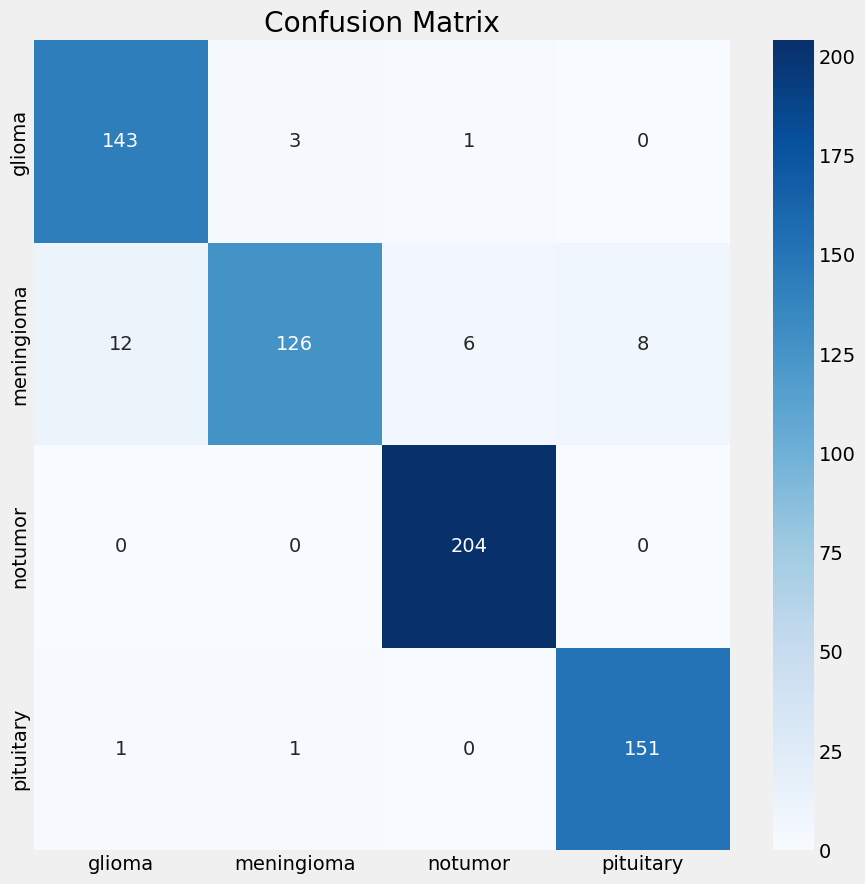

In [69]:
plt.figure(figsize = (10, 10))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[f"{i}" for i in classes], yticklabels=[f"{i}" for i in classes])

plt.title('Confusion Matrix')
plt.show()

In [74]:
print(classification_report(test_generator.classes, y_pred , target_names  = classes))

              precision    recall  f1-score   support

      glioma       0.92      0.97      0.94       147
  meningioma       0.97      0.83      0.89       152
     notumor       0.97      1.00      0.98       204
   pituitary       0.95      0.99      0.97       153

    accuracy                           0.95       656
   macro avg       0.95      0.95      0.95       656
weighted avg       0.95      0.95      0.95       656



End!